**predicting credit card fraud with EDA Classification Modelling**
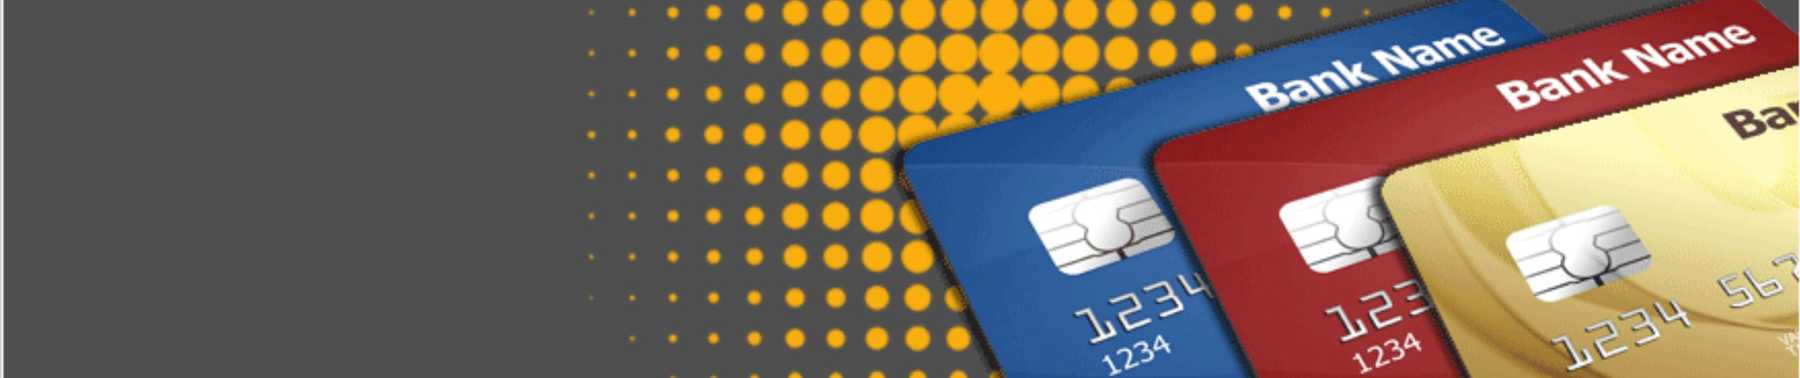

## Import Libraries

In [1]:
# Allows you to convert a Jupyter .ipynb notebook document file into 
#another static format including HTML, LaTeX, PDF, Markdown, 
# reStructuredText, and more.
import nbconvert
# linear algebra
import numpy as np 
# Data Processing with Dataframes
import pandas as pd 
#Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import seaborn as sns 
#plotting
import matplotlib.pyplot as plt 

In [2]:
#importing plotly for dashboard and EDA Visualization 
import plotly.express as px

## Read and load the csv files into dataframes

In [3]:
card_base_csv_path=pd.read_csv('/content/drive/MyDrive/projects/CardBase.csv');
customer_base_csv_path=pd.read_csv('/content/drive/MyDrive/projects/CustomerBase.csv');
fraud_base_csv_path=pd.read_csv('/content/drive/MyDrive/projects/FraudBase.csv');
transaction_base_csv_path=pd.read_csv('/content/drive/MyDrive/projects/TransactionBase.csv');


## Join or merge the four datasets to get a consolidated overview

In [4]:
dataframe1=pd.merge(customer_base_csv_path, card_base_csv_path, how="left", on=["Cust_ID"])
dataframe2=pd.merge(dataframe1,transaction_base_csv_path,how="left", left_on='Card_Number', right_on='Credit_Card_ID' )
transaction_details= pd.merge(dataframe2,fraud_base_csv_path, how="left", on="Transaction_ID" )

## Drop the duplicate column which appearing twice inside the dataFrame

In [5]:
transaction_details = transaction_details.drop('Credit_Card_ID', axis=1)

## Get the number of rows and columns present in the consolidated data

In [6]:
transaction_details.shape

(15192, 12)

## View the top 5 records from our Transaction details record


In [7]:
transaction_details.head()

,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit,Transaction_ID,Transaction_Date,Transaction_Value,Transaction_Segment,Fraud_Flag
0,CC25034,35,Diamond,VG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CC59625,22,Diamond,VG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CC69314,33,Diamond,VG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CC67036,46,Diamond,VG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC25597,44,Diamond,VG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get information about all columns: dataypes and number of null values contained inside this dataFrame

In [8]:
transaction_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15192 entries, 0 to 15191
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cust_ID                 15192 non-null  object 
 1   Age                     15192 non-null  int64  
 2   Customer_Segment        15192 non-null  object 
 3   Customer_Vintage_Group  15192 non-null  object 
 4   Card_Number             10000 non-null  object 
 5   Card_Family             10000 non-null  object 
 6   Credit_Limit            10000 non-null  float64
 7   Transaction_ID          10000 non-null  object 
 8   Transaction_Date        10000 non-null  object 
 9   Transaction_Value       10000 non-null  float64
 10  Transaction_Segment     10000 non-null  object 
 11  Fraud_Flag              109 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.5+ MB


In [9]:
#checking how many null values are present and its count
transaction_details.isnull().sum()

Cust_ID                       0
Age                           0
Customer_Segment              0
Customer_Vintage_Group        0
Card_Number                5192
Card_Family                5192
Credit_Limit               5192
Transaction_ID             5192
Transaction_Date           5192
Transaction_Value          5192
Transaction_Segment        5192
Fraud_Flag                15083
dtype: int64

We see from the above info() and isnull().sum() that many columns contain equal number of null values. So, we have to handle the null values as we will drop null values from one particular column to check if other columns contain missing values in the same rows.

We also drop the duplicates present.


In [10]:
transaction_details.drop_duplicates(inplace=True)
transaction_details.dropna(subset=['Card_Number'],inplace=True)

Now, Again we check the isnull().sum() and info() to get the data as how many null values are present in our dataset.

In [11]:
transaction_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 12 to 15179
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cust_ID                 10000 non-null  object 
 1   Age                     10000 non-null  int64  
 2   Customer_Segment        10000 non-null  object 
 3   Customer_Vintage_Group  10000 non-null  object 
 4   Card_Number             10000 non-null  object 
 5   Card_Family             10000 non-null  object 
 6   Credit_Limit            10000 non-null  float64
 7   Transaction_ID          10000 non-null  object 
 8   Transaction_Date        10000 non-null  object 
 9   Transaction_Value       10000 non-null  float64
 10  Transaction_Segment     10000 non-null  object 
 11  Fraud_Flag              109 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1015.6+ KB


In [13]:
#again, checking how many null values are present and its count
transaction_details.isnull().sum()

Cust_ID                      0
Age                          0
Customer_Segment             0
Customer_Vintage_Group       0
Card_Number                  0
Card_Family                  0
Credit_Limit                 0
Transaction_ID               0
Transaction_Date             0
Transaction_Value            0
Transaction_Segment          0
Fraud_Flag                9891
dtype: int64

Our target column- Fraud_Flag is an object type column. We convert this an integer-type column for building our model, and fill the Fraud_Flag column with 0 for the non-fraud records. 

Also, converting the Transaction_Date colum to datetime so that extraction of necessary information is possible.


In [14]:
#fill 0 as the value is the Fraud_Fla column for the valid transactions
transaction_details['Fraud_Flag'].fillna(0, inplace=True)
transaction_details['Fraud_Flag']=transaction_details['Fraud_Flag'].astype(int)
transaction_details['Transaction_Date']=pd.to_datetime(transaction_details['Transaction_Date'])

###Exploratory Data Analysis
Here, we get a glimpse of our dataset.


In [15]:
## card type distribution
card_base_csv_path.nunique()
px.histogram(data_frame=card_base_csv_path, x='Card_Family')


In [16]:
## Plotting credit limit distribution to check majority/minority bins.
## Conclusion: Credit limits up to 200k construct majority, less than 50k is highest. Further check which bin is targeted for frauds.
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=card_base_csv_path['Credit_Limit'],
    marker_color='green',
    opacity=0.75
))
fig.update_layout(
    title_text='Credit Distribution', # title of plot
    xaxis_title_text='Credit_Limit', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [17]:

## Plotting age distribution to check if particular age group is majority/minority.
## Conclusion: No particular age group in majority/minority.
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=customer_base_csv_path['Age'],
    marker_color='green',
    opacity=0.75
))
fig.update_layout(
    title_text='Age Distribution', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [18]:
# Converting strings to pd.DateTime format.
transaction_base_csv_path['Transaction_Date'] = pd.to_datetime(transaction_base_csv_path['Transaction_Date'], format='%d-%b-%y')

In [19]:
transaction_base_csv_path['Transaction_Date'].nunique() ## 366 unique dates, Data for complete 2016.
## plotting transaction counts on
## daily basis
df = transaction_base_csv_path.sort_values(by='Transaction_Date')#.value_counts()
df.index = df['Transaction_Date']
df['Transaction_Count'] = pd.DataFrame(np.ones(10000,dtype=int), index=df.index)
df = df.groupby(by=df.index).sum()
px.line(data_frame=df,x=df.index, y='Transaction_Count', title='Daily Transactions')
## no conclusive pattern

In [20]:
## monthly basis
df_m = df.resample('M').sum()
px.line(data_frame=df_m,x=df_m.index, y='Transaction_Count', title='Monthly Transactions')
## no conclusive pattern other than transaction decline at end of financial year

**Table Merge**

In [21]:
## left merge || merging transaction base and fraud base 
## conclusion: Most frauds happening in sep months, but overalll evenly distributed across year
trfr_l = pd.merge(transaction_base_csv_path, fraud_base_csv_path, how='left', on='Transaction_ID')
trfr_l['Fraud_Flag'] = trfr_l['Fraud_Flag'].fillna(0)
df = trfr_l.sort_values(by='Transaction_Date')
df_g = df.groupby(by='Transaction_Date').sum()
df_m = df_g.resample('M').sum()
px.line(data_frame=df_m, x=df_m.index, y='Fraud_Flag',title='Transaction Date Wise Fraud Flag Riased...')

In [22]:
df = trfr_l.sort_values(by='Transaction_Date')
px.histogram(data_frame=df, x='Transaction_Segment',color='Fraud_Flag', title='Frauds per Segment')
#sns.histplot(df, x='Transaction_Segment', hue='Fraud_Flag')


In [23]:
# right merge
trfr_r = pd.merge(transaction_base_csv_path, fraud_base_csv_path, how='right', on='Transaction_ID')
trfr_r
df = trfr_r.sort_values(by='Transaction_Date')
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=trfr_r['Transaction_Segment'],
    marker_color='green',
    opacity=0.75
))
fig.update_layout(
    title_text='Transaction_Segment', # title of plot
    xaxis_title_text='Segment_type', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [24]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=trfr_r['Transaction_Value'],
    marker_color='red',
    opacity=0.75
))
fig.update_layout(
    title_text='Fraud Transaction Value', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [25]:
crcs = pd.merge(card_base_csv_path, customer_base_csv_path, how='inner', on='Cust_ID')
# Renaming Primary key column(Card_Number)
crcs.columns = ['Credit_Card_ID', 'Card_Family', 'Credit_Limit', 'Cust_ID', 'Age', 'Customer_Segment', 'Customer_Vintage_Group']
crcs

,Credit_Card_ID,Card_Family,Credit_Limit,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group
0,8638-5407-3631-8196,Premium,530000,CC67088,27,Diamond,VG1
1,7106-4239-7093-1515,Gold,18000,CC12076,48,Gold,VG3
2,6492-5655-8241-3530,Premium,596000,CC97173,22,Diamond,VG1
3,2868-5606-5152-5706,Gold,27000,CC55858,30,Diamond,VG1
4,1438-6906-2509-8219,Platinum,142000,CC90518,50,Platinum,VG2
...,...,...,...,...,...,...,...
495,4708-4407-9601-6022,Premium,691000,CC64993,34,Diamond,VG1
496,6042-2856-7280-2925,Gold,33000,CC26787,46,Platinum,VG2
497,8706-3809-5167-3899,Premium,144000,CC32532,28,Platinum,VG2
498,9540-8558-5897-5046,Premium,830000,CC90246,35,Gold,VG3


In [26]:
# final merge to get all transactional info
df_final = pd.merge(trfr_l, crcs, how='left', on='Credit_Card_ID')
df_final = df_final.sort_values(by='Transaction_Date')

In [27]:
## plotting age groups vulnerable to frauds
## conclusion: age group of 20-40 is more vulnerable to frauds
df = df_final.loc[df_final['Fraud_Flag'] == 1.0].groupby(by='Cust_ID').mean()
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df['Age'],
    marker_color='purple',
    opacity=0.75,
    nbinsx=2
))
fig.update_layout(
    title_text='Age Distribution of customers who were victim', # title of plot
    xaxis_title_text='Age bin', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

customers segments who were victim

In [28]:
df_final.loc[df_final['Fraud_Flag'] == 1.0].drop_duplicates(subset='Cust_ID')

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Fraud_Flag,Card_Family,Credit_Limit,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group
9444,CTID89585938,2016-01-03,1519-5130-5810-8539,36219,SEG11,1.0,Premium,742000,CC88046,41,Diamond,VG1
580,CTID26555772,2016-01-11,5734-5619-8469-4044,683,SEG22,1.0,Gold,36000,CC87306,30,Diamond,VG1
957,CTID81479835,2016-01-16,3295-6390-4452-7199,41525,SEG17,1.0,Gold,6000,CC76008,42,Diamond,VG1
3322,CTID92439353,2016-01-17,8159-1257-4706-7544,5079,SEG11,1.0,Premium,410000,CC34083,41,Diamond,VG1
9734,CTID99663510,2016-01-18,8783-7271-8493-7931,6044,SEG17,1.0,Premium,677000,CC39128,23,Gold,VG3
...,...,...,...,...,...,...,...,...,...,...,...,...
6082,CTID30763806,2016-12-17,6722-7299-6082-7974,40751,SEG21,1.0,Gold,34000,CC87034,36,Platinum,VG2
1905,CTID41668436,2016-12-23,4012-7774-6690-7055,6477,SEG20,1.0,Platinum,159000,CC29686,36,Platinum,VG2
2267,CTID95859840,2016-12-24,4856-2191-9879-6388,34214,SEG21,1.0,Gold,11000,CC38711,43,Diamond,VG1
9933,CTID30494187,2016-12-31,9018-5320-5729-5393,14586,SEG20,1.0,Premium,444000,CC54582,29,Gold,VG3


In [29]:
## customer segments affected by frauds
## conclusion: Diamond segment customers are more prone to frauds compared to gold and platinum
df = df_final.loc[df_final['Fraud_Flag'] == 1.0].drop_duplicates(subset='Cust_ID')
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df['Customer_Segment'],
    marker_color='blue',
    opacity=0.75
))
fig.update_layout(
    title_text='customers segments who were victim', # title of plot
    xaxis_title_text='Segments', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [30]:
## customer vintage group affected by frauds
## conclusion: Customer vintage grp and customer segments are highly correlated, thus should be dropped.
df = df_final.loc[df_final['Fraud_Flag'] == 1.0].drop_duplicates(subset='Cust_ID')
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df['Customer_Vintage_Group'],
    marker_color='green',
    opacity=0.75
))
fig.update_layout(
    title_text='customer vintage group who were victim', # title of plot
    xaxis_title_text='Vintage Group', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [31]:
## customer segments affected by frauds
## conclusion: 
df = df_final.loc[df_final['Fraud_Flag'] == 1.0].drop_duplicates(subset='Cust_ID')
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df['Card_Family'],
    marker_color='violet',
    opacity=0.75
))
fig.update_layout(
    title_text='Card Family of victims', # title of plot
    xaxis_title_text='Card Family', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

We plot the correlation matrix for checking any correlation between the numerical features

====Identify the Co-relation with Age, Credit Limit, Transaction Value & Fraud Flag=======                         Age  Credit_Limit  Transaction_Value  Fraud_Flag
Age                1.000000     -0.012878          -0.001739   -0.006525
Credit_Limit      -0.012878      1.000000          -0.006661   -0.005704
Transaction_Value -0.001739     -0.006661           1.000000    0.014976
Fraud_Flag        -0.006525     -0.005704           0.014976    1.000000


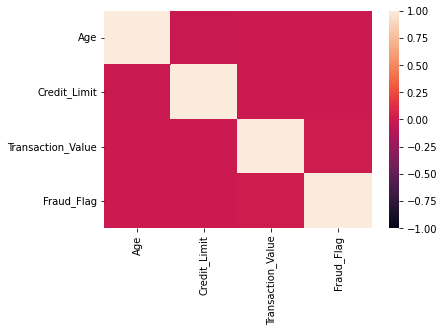

In [32]:
#Checking the correlation matrix for finding correlation between the numeric variables
corr_matrix_identification = transaction_details.corr()
print("====Identify the Co-relation with Age, Credit Limit, Transaction Value & Fraud Flag=======",corr_matrix_identification)
fig = plt.figure(figsize = (6, 4))
sns.heatmap(corr_matrix_identification, vmin=-1, vmax=1)
plt.show()

Next, we try to understand how imbalanced our dataset is with the help of a countplot.

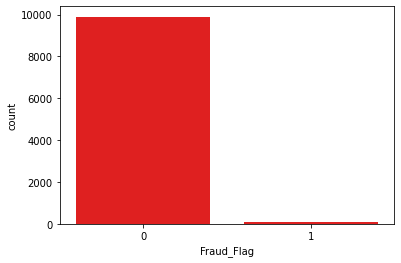

In [33]:
sns.countplot(x=transaction_details['Fraud_Flag'],color='red')

Thus, we see that we are dealing with a very heavily imbalanced dataset here. We will be using sampling methods to effectively deal with this, prior to building our classification model.

## Exploring high-level summary of transactions and frauds.

We have a number of categorical variables present in our dataset. We will visualize the total number of frauds against these categories for making a high-level comparitive study.


<Figure size 432x288 with 0 Axes>

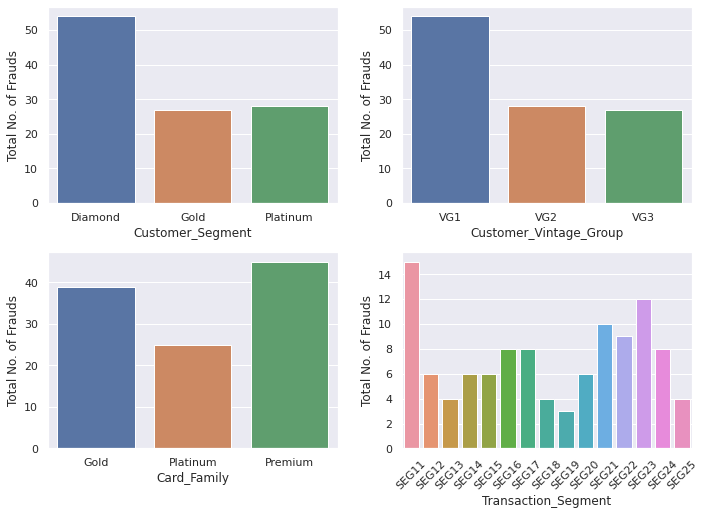

In [34]:
#Using seaborn to draw 4 barplots for 4 different categorical variables
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

fig = plt.figure()

cust_seg_data=transaction_details.groupby(['Customer_Segment'])[['Fraud_Flag']].sum().reset_index()
cust_grp_data=transaction_details.groupby(['Customer_Vintage_Group'])[['Fraud_Flag']].sum().reset_index()
card_fam_data=transaction_details.groupby(['Card_Family'])[['Fraud_Flag']].sum().reset_index()
trans_seg_data=transaction_details.groupby(['Transaction_Segment'])[['Fraud_Flag']].sum().reset_index()

fig, axes = plt.subplots(2,2,figsize=(10, 7))

ax1=sns.barplot(data = cust_seg_data, x='Customer_Segment', y='Fraud_Flag', ax=axes[0,0])
ax1.set( ylabel='Total No. of Frauds')

ax2=sns.barplot(data = cust_grp_data, x='Customer_Vintage_Group', y='Fraud_Flag', ax=axes[0,1])
ax2.set( ylabel='Total No. of Frauds')

ax3=sns.barplot(data = card_fam_data, x='Card_Family', y='Fraud_Flag', ax=axes[1,0])
ax3.set( ylabel='Total No. of Frauds')

ax4=sns.barplot(data = trans_seg_data, x='Transaction_Segment', y='Fraud_Flag', ax=axes[1,1])
ax4.set( ylabel='Total No. of Frauds')

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

We see that Diamond Customer Segment and VG1 Customer Vintage Group account for more than 50% of the total frauds. However, the distribution of the first two plots appear very similar. We will explore if Customer Segment and Customer Vintage Group are directly co-related further below.

For Card Family- (Premium), the total number of frauds is significantly higher than the other two categories.

In [35]:
transaction_details[['Customer_Segment','Customer_Vintage_Group']].value_counts()

Customer_Segment  Customer_Vintage_Group
Diamond           VG1                       4460
Gold              VG3                       3252
Platinum          VG2                       2288
dtype: int64

We see that the two features Customer_Segment and Customer_Vintage_Group have a one-to-one direct relation. That is, for example, every Diamond Segment customer only belongs to the VG1 Customer Vintage Group and no other Customer Vintage Group. This holds true for the GOld and Platinum Segment customers as well.

Plotting the distribution of frauds by month:

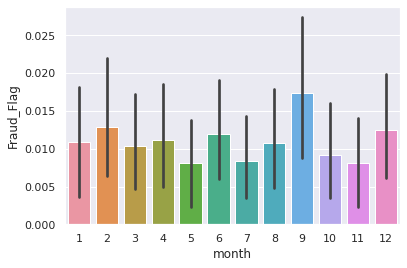

In [36]:
#transaction_details[['Transaction_Date']].value_counts()
transaction_details['year'] = pd.DatetimeIndex(transaction_details['Transaction_Date']).year
transaction_details['year']=transaction_details['year'].astype(int)

transaction_details['month'] = pd.DatetimeIndex(transaction_details['Transaction_Date']).month
transaction_details['month']=transaction_details['month'].astype(int)

transaction_details[['year','month']].value_counts()
df=transaction_details.groupby(['year','month'])[['Fraud_Flag']].sum().reset_index()

sns.barplot(data=transaction_details, x='month', y='Fraud_Flag')

Visualizing the relationship between the different card families and their credit limit below:

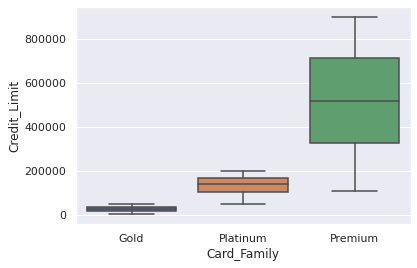

In [37]:
sns.boxplot(data=transaction_details, x='Card_Family', y='Credit_Limit')


Next, we try to understand how the numerical features relate to the cases of fraud using the plots below:

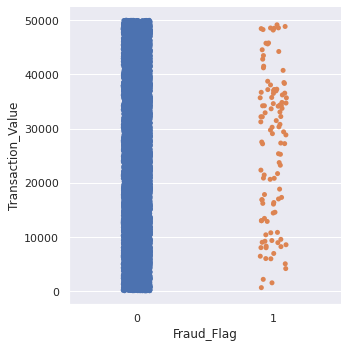

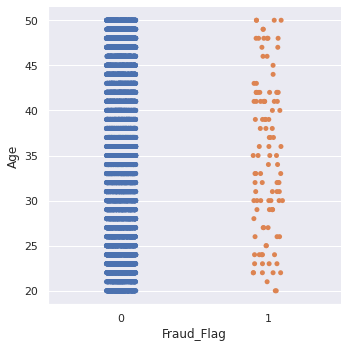

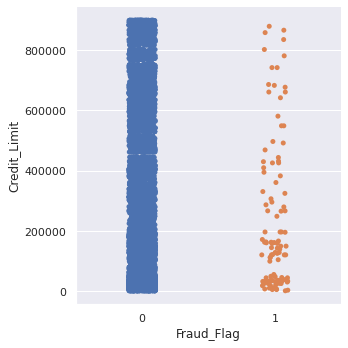

In [38]:
sns.catplot(data=transaction_details, x='Fraud_Flag', y='Transaction_Value')
sns.catplot(data=transaction_details, x='Fraud_Flag', y='Age')
sns.catplot(data=transaction_details, x='Fraud_Flag', y='Credit_Limit')

We can clearly see that, we have more cases of fraud in cards with lower credit limits.

## Encoding important categorical features:

Using one-hot dummy Encoding to encode categorical features like : Customer_Segment, Card_Family, Transaction_Segment.

In [39]:
transaction_all_1_data=pd.get_dummies(transaction_details, columns=['Customer_Segment'],  drop_first=True,prefix='Cust_').copy()
transaction_all_2_data=pd.get_dummies(transaction_all_1_data, columns=['Card_Family'], drop_first=True, prefix='Card_').copy()
transactions_onehot_data_load=pd.get_dummies(transaction_all_2_data, columns=['Transaction_Segment'], drop_first=True, prefix='Trans').copy()

In [40]:
transactions_onehot_data_load.head(2)

,Cust_ID,Age,Customer_Vintage_Group,Card_Number,Credit_Limit,Transaction_ID,Transaction_Date,Transaction_Value,Fraud_Flag,year,...,Trans_SEG16,Trans_SEG17,Trans_SEG18,Trans_SEG19,Trans_SEG20,Trans_SEG21,Trans_SEG22,Trans_SEG23,Trans_SEG24,Trans_SEG25
12,CC55858,30,VG1,2868-5606-5152-5706,27000.0,CTID98358171,2016-05-12,19701.0,0,2016,...,0,0,0,1,0,0,0,0,0,0
13,CC55858,30,VG1,2868-5606-5152-5706,27000.0,CTID13079106,2016-06-17,22753.0,0,2016,...,1,0,0,0,0,0,0,0,0,0


## Feature Scaling

We see that the numerical features like Age, Credit_Limit and Transaction_Value have varying degrees of magnitude and range. So, in order to standardize them, we use feature scaling with Standard scaler.

In [41]:
from sklearn.preprocessing import StandardScaler

#using standard scaler
transactions_onehot_data_load['normAge'] = StandardScaler().fit_transform(transactions_onehot_data_load[['Age']])
transactions_onehot_data_load['normCredit_Limit'] = StandardScaler().fit_transform(transactions_onehot_data_load[['Credit_Limit']])
transactions_onehot_data_load['normTransaction_Value'] = StandardScaler().fit_transform(transactions_onehot_data_load[['Transaction_Value']])

#dropping the features we will not be using for our model input
drop_features=['Age','Cust_ID','Card_Number','Credit_Limit','Transaction_Value','Customer_Vintage_Group','Transaction_ID','Transaction_Date','year','month',"Fraud_Flag"]

#preparing the feature and target variables for our model-before sampling
X=transactions_onehot_data_load.drop(drop_features, axis=1)
Y = transactions_onehot_data_load["Fraud_Flag"]
X.columns
X.head()

,Cust__Gold,Cust__Platinum,Card__Platinum,Card__Premium,Trans_SEG12,Trans_SEG13,Trans_SEG14,Trans_SEG15,Trans_SEG16,Trans_SEG17,...,Trans_SEG19,Trans_SEG20,Trans_SEG21,Trans_SEG22,Trans_SEG23,Trans_SEG24,Trans_SEG25,normAge,normCredit_Limit,normTransaction_Value
12,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.636981,-0.832997,-0.351956
13,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.636981,-0.832997,-0.139575
14,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.636981,-0.832997,-0.059688
15,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-0.636981,-0.832997,1.526353
16,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.636981,-0.832997,1.524474


Next we try to find the quantitative imbalance present in the data.

In [42]:
#output the imbalance in the data
fraud_data = transactions_onehot_data_load[transactions_onehot_data_load['Fraud_Flag'] == 1] 
valid_data = transactions_onehot_data_load[transactions_onehot_data_load['Fraud_Flag'] == 0] 
outlierFraction = len(fraud_data)/float(len(valid_data)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(transactions_onehot_data_load[transactions_onehot_data_load['Fraud_Flag'] == 1]))) 
print('Valid Transactions: {}'.format(len(transactions_onehot_data_load[transactions_onehot_data_load['Fraud_Flag'] == 0]))) 

0.011020119300374078
Fraud Cases: 109
Valid Transactions: 9891


We see that just a little over 1% of the cases are classified as fraud. This clearly shows that the datatset is heavily imbalanced.

## Sampling - Oversampling

We use random oversampling to scale up the minority class and train our model to even out the imbalance in our dataset.

In [43]:
from sklearn.utils import resample

fraud_upsampled = resample(fraud_data,
                                replace = True,
                                n_samples = len(valid_data), # match minority n
                                random_state = 27,
                                ) 

oversampled = pd.concat([valid_data, fraud_upsampled])

#creating our feature and target arrays from the sampled data
X_over =oversampled.drop(drop_features, axis=1)
Y_over = oversampled["Fraud_Flag"]

#printing the counts for fraud and non-fraud cases in our resampled data
oversampled.Fraud_Flag.value_counts()


0    9891
1    9891
Name: Fraud_Flag, dtype: int64

## Building our model:

We build two classifiers: Logistic Regression and Random Forest Classifier and evaluate them to select the one with the best precision and recall. Since our dataset is imbalanced, accuracy is not a correct metric for model evaluation.

In [44]:
#import necessary packages for building a logistic regression mode and Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import necessary packages for evaluation metrics
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
xData = X.values
yData = Y.values

xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


(10000, 21)
(10000,)


We train the model with the resampled data and then evaluate it with data from our original dataset.

In [45]:
#splitting out dataset into testing and training sets
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(
        X_over, Y_over, test_size = 0.2, random_state = 42)

#building the Random forest classifier from our sampled training data
rfc2 = RandomForestClassifier()
# fitting the classifier to the oversampled training data
rfc2.fit(xTrain2, yTrain2)
yPred2 = rfc2.predict(xTest)
print(yPred2)

logreg = LogisticRegression()
logreg.fit(xTrain2, yTrain2)

# Predict the labels of the test set
y_pred_log2 = logreg.predict(xTest)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



[0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



## Evaluating our model:

We evaluate our classification model based on precision, Recall and F1-score. Accuracy is not a correct metric here, since our dataset is highly skewed in favour of one particular class.

Model: Random Forest classifier
Accuracy: 0.9995
Precision: 0.9523809523809523
Recall: 1.0
F1 Score 0.975609756097561


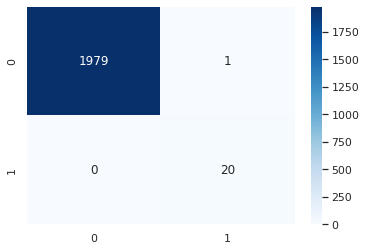

In [46]:
print("Model: Random Forest classifier")

#Computing the accuracy, precision, recall and F1 score for the RF classifier
acc = accuracy_score(yTest, yPred2)
print("Accuracy: {}".format(acc))
prec = precision_score(yTest, yPred2)
print("Precision: {}".format(prec))
rec = recall_score(yTest, yPred2)
print("Recall: {}".format(rec))
f1 = f1_score(yTest, yPred2)
print("F1 Score {}".format(f1))
cf_matrix=confusion_matrix(yTest, yPred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
plt.show()


## Computing the accuracy, precision, recall and F1 score for the Ogistic Regression model

In [47]:
print("\n\nModel: Logistic Regression")
acc = accuracy_score(yTest, y_pred_log2)
print("Accuracy: {}".format(acc))
prec_log = precision_score(yTest, y_pred_log2)
print("Precision for logReg: {}".format(prec_log))
rec_log = recall_score(yTest, y_pred_log2)
print("Recall: {}".format(rec_log))
f1 = f1_score(yTest, y_pred_log2)
print("F1 Score {}".format(f1))
print(confusion_matrix(yTest, y_pred_log2))



Model: Logistic Regression
Accuracy: 0.548
Precision for logReg: 0.012141280353200883
Recall: 0.55
F1 Score 0.023758099352051837
[[1085  895]
 [   9   11]]


## Understanding feature importances:

We try to understand the relative importance of the different features in our RF model with help of the barplot below:

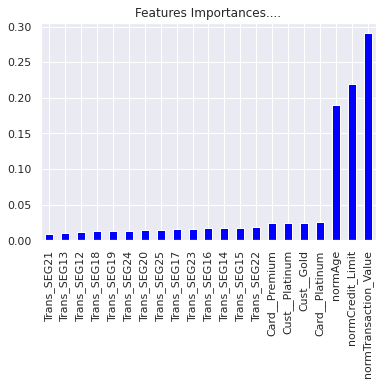

In [48]:
importances = pd.Series(data=rfc2.feature_importances_,
                        index= xTrain2.columns)
importances_sorted = importances.sort_values()
#plotting the feature importances
importances_sorted.plot(kind='bar', color='blue')
plt.title('Features Importances....')
plt.show()

## Hyperparameter tuning for Logistic Regression:

In [49]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating a logreg classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fitting to the training data
logreg_cv.fit(xTrain2, yTrain2)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

y_pred_log2 = logreg_cv.predict(xTest)
print("\nModel: Logistic Regression")

#Computing the evaluation scores
acc = accuracy_score(yTest, y_pred_log2)
print("Accuracy: {}".format(acc))
prec_log = precision_score(yTest, y_pred_log2)
print("Precision for logReg: {}".format(prec_log))
rec_log = recall_score(yTest, y_pred_log2)
print("Recall: {}".format(rec_log))
f1 = f1_score(yTest, y_pred_log2)
print("F1 Score {}".format(f1))
print(confusion_matrix(yTest, y_pred_log2))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.5993680884676145

Model: Logistic Regression
Accuracy: 0.5485
Precision for logReg: 0.012154696132596685
Recall: 0.55
F1 Score 0.023783783783783784
[[1086  894]
 [   9   11]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Tuning hyperparamter C for Logistic Regression only marginally increases the performance of the model, the RF Classifier still performs much better.

So, for predicting credit card frauds, it is better to use a Random Forest Classifier.